![](cric_player.jpg)

In [116]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,f1_score
from scipy.stats import zscore # to remove outliers
from sklearn.preprocessing import LabelEncoder # to convert object into int
from sklearn.preprocessing import StandardScaler # for normalize the data
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix

## Load Dataset

In [117]:
data = pd.read_csv('Batsman_Data.csv')
data1 = pd.read_csv('Bowler_data.csv')
data2 = pd.read_csv('Ground_Averages.csv')
data3 = pd.read_csv('ODI_Match_Results.csv')
data4 = pd.read_csv('ODI_Match_Totals.csv')
data5 = pd.read_csv('WC_players.csv')

In [118]:
data.head(100)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,92*,92,64,143.75,8,5,v India,North Sound,11 Jun 2011,ODI # 3161,Andre Russell,276298
96,97,25,25,14,178.57,3,1,v India,North Sound,13 Jun 2011,ODI # 3162,Andre Russell,276298
97,98,DNB,-,-,-,-,-,v India,Kingston,16 Jun 2011,ODI # 3163,Andre Russell,276298
98,99,7*,7,3,233.33,1,0,v Bangladesh,Dhaka,13 Oct 2011,ODI # 3198,Andre Russell,276298


In [119]:
data_copy = data.drop(['Bat1'],axis=1).copy()

In [120]:
data1.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [121]:
data2.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [122]:
data3.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [123]:
data4.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [124]:
data5.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


## Dimensions of Data

In [125]:
df=[data_copy, data1,data2, data3, data4, data5]

In [126]:
data_copy.shape

(11149, 12)

In [127]:
def dimentions(df):
    for i in df:
        print(i.shape)
        print('*'*100)
        print(i.info())
        print('*'*100)
        print(i.isna().sum())

In [128]:
dimentions(df)

(11149, 12)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Runs        11149 non-null  object
 2   BF          11149 non-null  object
 3   SR          11149 non-null  object
 4   4s          11149 non-null  object
 5   6s          11149 non-null  object
 6   Opposition  11149 non-null  object
 7   Ground      11149 non-null  object
 8   Start Date  11149 non-null  object
 9   Match_ID    11149 non-null  object
 10  Batsman     11149 non-null  object
 11  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.0+ MB
None
****************************************************************************************************
Unnamed: 0    0
Runs          0
BF            0
SR           

In [129]:
data.isna().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

Observation == so from above mentioned information we can see the in data 3 and data 4 have null values and other data frame dont have null values.

In [130]:
#  Check the Duplicates if avilable 
def remove_duplicates(df):
    for i in df:
        i.drop_duplicates(inplace=True)
        print(i.shape)
        print('*'*100)

In [131]:
remove_duplicates(df)

(11149, 12)
****************************************************************************************************
(11118, 14)
****************************************************************************************************
(106, 11)
****************************************************************************************************
(1322, 12)
****************************************************************************************************
(1296, 13)
****************************************************************************************************
(152, 3)
****************************************************************************************************


In [132]:
def summary(df):
    for i in df:
        print(i.describe(include='all'))
        print('*'*100)

In [133]:
summary(df)

         Unnamed: 0   Runs     BF     SR     4s     6s   Opposition Ground  \
count   11149.00000  11149  11149  11149  11149  11149        11149  11149   
unique          NaN    180    163   2032     26     17           22    134   
top             NaN      -      -      -      0      0  v Sri Lanka  Dhaka   
freq            NaN   2231   2231   2331   2901   6368         1283    839   
mean     5575.00000    NaN    NaN    NaN    NaN    NaN          NaN    NaN   
std      3218.58341    NaN    NaN    NaN    NaN    NaN          NaN    NaN   
min         1.00000    NaN    NaN    NaN    NaN    NaN          NaN    NaN   
25%      2788.00000    NaN    NaN    NaN    NaN    NaN          NaN    NaN   
50%      5575.00000    NaN    NaN    NaN    NaN    NaN          NaN    NaN   
75%      8362.00000    NaN    NaN    NaN    NaN    NaN          NaN    NaN   
max     11149.00000    NaN    NaN    NaN    NaN    NaN          NaN    NaN   

         Start Date    Match_ID    Batsman     Player_ID  
coun

In [134]:
# As our data set has start date or date column so lets first seaprate them into day, month and year wise and drop the orignal one
def seprate_date(df):
    for i in range(len(df)):
        if 'Start Date' in df[i].columns:
            df[i]['Year']=pd.to_datetime(df[i]['Start Date'])
            df[i]['Month']=df[i]['Year'].apply(lambda x:x.month) # Extracting Month
            df[i]['Day']=df[i]['Year'].apply(lambda x:x.day)  # Extracting day
            df[i]['year']=df[i]['Year'].apply(lambda x:x.year)  # Extracting year
            print(df[i].head())
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have 'Satrt Date' column")
            print("-------------------------")

def seperate_date(df):
    for i in range(len(df)):
        if 'Start Date' in df[i].columns:
            df[i]['Year']=pd.to_datetime(df[i]['Start Date'])
            df[i]['Month']=df[i]['Year'].apply(lambda x:x.month)
            df[i]['Day']=df[i]['Year'].apply(lambda x:x.day)
            df[i]['year']=df[i]['Year'].apply(lambda x:x.year)
            print(df[i].head())
            print("---------------------------")
        else:
            print("DataFrame", i, "does not have 'Start Date' column")
            print("-------------------------")

In [135]:
seperate_date(df)

   Unnamed: 0 Runs BF SR 4s 6s    Opposition   Ground   Start Date  \
0           1    -  -  -  -  -       v India   Nagpur  18 Dec 2009   
1           2    -  -  -  -  -       v India  Kolkata  24 Dec 2009   
2           3    -  -  -  -  -       v India    Delhi  27 Dec 2009   
3           4    -  -  -  -  -  v Bangladesh    Dhaka   4 Jan 2010   
4           5    -  -  -  -  -       v India    Dhaka   5 Jan 2010   

     Match_ID        Batsman  Player_ID       Year  Month  Day  year  
0  ODI # 2933  Oshane Thomas      49619 2009-12-18     12   18  2009  
1  ODI # 2935  Oshane Thomas      49619 2009-12-24     12   24  2009  
2  ODI # 2936  Oshane Thomas      49619 2009-12-27     12   27  2009  
3  ODI # 2937  Oshane Thomas      49619 2010-01-04      1    4  2010  
4  ODI # 2938  Oshane Thomas      49619 2010-01-05      1    5  2010  
---------------------------
   Unnamed: 0 Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground  \
0           1   8.0    0   57    0  7.12     

In [136]:
# Drop irrelavent columns from the datasets
def drop_irrelevant(df):
    for i in range(len(df)):
        columns_to_drop = ['Unnamed: 0', 'Start Date', 'Year']
        irrelevant_columns = [col for col in columns_to_drop if col in df[i].columns]
        #____________________________________________________________________________#
        ''' Explain list comprehension
        
        for i in range(len(df)):
        columns_to_drop = ['Unnamed: 0', 'Start Date', 'Year']
        irrelevant_columns = []
        for col in columns_to_drop:
            if col in df[i].columns:
                irrelevant_columns.append(col)
        '''
        #____________________________________________________________________________#
        
        if irrelevant_columns:
            df[i].drop(columns=irrelevant_columns, axis=1, inplace=True)
            print("DataFrame", i, "after dropping irrelevant columns:")
            print(df[i].head())  # Printing the DataFrame after dropping columns
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have any irrelevant columns")
            print("-------------------------")        

In [137]:
drop_irrelevant(df)

DataFrame 0 after dropping irrelevant columns:
  Runs BF SR 4s 6s    Opposition   Ground    Match_ID        Batsman  \
0    -  -  -  -  -       v India   Nagpur  ODI # 2933  Oshane Thomas   
1    -  -  -  -  -       v India  Kolkata  ODI # 2935  Oshane Thomas   
2    -  -  -  -  -       v India    Delhi  ODI # 2936  Oshane Thomas   
3    -  -  -  -  -  v Bangladesh    Dhaka  ODI # 2937  Oshane Thomas   
4    -  -  -  -  -       v India    Dhaka  ODI # 2938  Oshane Thomas   

   Player_ID  Month  Day  year  
0      49619     12   18  2009  
1      49619     12   24  2009  
2      49619     12   27  2009  
3      49619      1    4  2010  
4      49619      1    5  2010  
-------------------------
DataFrame 1 after dropping irrelevant columns:
  Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground    Match_ID  \
0   8.0    0   57    0  7.12      -     -       v India   Nagpur  ODI # 2933   
1  10.0    0   55    2  5.50  27.50  30.0       v India  Kolkata  ODI # 2935   
2     -  

In [138]:
df[0]

,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,-,-,-,-,-,v India,Nagpur,ODI # 2933,Oshane Thomas,49619,12,18,2009
1,-,-,-,-,-,v India,Kolkata,ODI # 2935,Oshane Thomas,49619,12,24,2009
2,-,-,-,-,-,v India,Delhi,ODI # 2936,Oshane Thomas,49619,12,27,2009
3,-,-,-,-,-,v Bangladesh,Dhaka,ODI # 2937,Oshane Thomas,49619,1,4,2010
4,-,-,-,-,-,v India,Dhaka,ODI # 2938,Oshane Thomas,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,46,61,75.40,6,1,v Ireland,Dehradun,ODI # 4100,Gulbadin Naib,352048,2,28,2019
11145,3,6,50.00,0,0,v Ireland,Dehradun,ODI # 4101,Gulbadin Naib,352048,3,2,2019
11146,1,8,12.50,0,0,v Ireland,Dehradun,ODI # 4108,Gulbadin Naib,352048,3,8,2019
11147,-,-,-,-,-,v Scotland,Edinburgh,ODI # 4131,Gulbadin Naib,352048,5,10,2019


In [139]:
df_list=[df[0],data1,data2,data3,data4,data5]

In [140]:
# As we seen there are object type of data avilabe in the all the dataset so lets seaprate them and encode them into numeric form .
# lets seaprate the catogorical data & numirical data
from sklearn.preprocessing import LabelEncoder

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

def get_categorical_columns(df_list):
    cat_col_list = []  # List to store categorical column names for each DataFrame

    for df in df_list:
        cat_col = []  # List to store categorical column names for the current DataFrame
        features = df.columns.values.tolist()

        for col in features:
            if df[col].dtype not in numerics:  # Check if the column's data type is non-numeric
                cat_col.append(col)

        cat_col_list.append(cat_col)

    return cat_col_list

def label_encode_categorical_columns(df_list):
    label = LabelEncoder()

    categorical_columns_list = get_categorical_columns(df_list)

    for i, cat_col in enumerate(categorical_columns_list):
        for col in cat_col:
            encoded_values = label.fit_transform(df_list[i][col])
            df_list[i][col] = encoded_values


In [141]:
label_encode_categorical_columns(df_list)

In [142]:
df[0].head()

,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,0,0,0,0,0,9,92,759,113,49619,12,18,2009
1,0,0,0,0,0,9,78,761,113,49619,12,24,2009
2,0,0,0,0,0,9,37,762,113,49619,12,27,2009
3,0,0,0,0,0,4,38,763,113,49619,1,4,2010
4,0,0,0,0,0,9,38,764,113,49619,1,5,2010


In [143]:
data1.head(2)

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,49,1,59,1,412,0,0,9,92,759,138,49619,12,18,2009
1,12,1,57,3,316,103,77,9,78,761,138,49619,12,24,2009


In [144]:
data2.head(2)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,23,4,4,4,0,0,2161,72,2297,30.01,5.64
1,26,6,4,4,0,0,1789,75,2331,23.85,4.60


In [145]:
data3.head(3)

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,6,160,NaN,1,1,5,57,0,6,7,1,3,2013
1,3,160,NaN,2,2,11,57,0,4,6,1,3,2013
2,3,3,NaN,1,2,5,29,1,6,7,1,6,2013


In [146]:
data4.head(2)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,404,48.3,165,NaN,1,4,5,57,0,6,7,1,3,2013
1,115,48.0,25,251.0,2,1,11,57,0,4,6,1,3,2013


In [147]:
data5.head(2)

,Player,ID,Country
0,42,352048,0
1,118,793463,0


## As we seen the in dataset no3 and 4 has null values so lets treat them by using iterative imputation techniques

In [148]:

data3.isnull().sum()

Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [149]:
data4.isnull().sum()

Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [150]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_list2 = [data3, data4]

def treat_missing_value(df_list2):
    for i in range(len(df_list2)):
        df_imputed = imputer.fit_transform(df_list2[i])
        df_list2[i] = pd.DataFrame(df_imputed, columns=df_list2[i].columns)
        print("DataFrame", i, "after imputation:")
        print(df_list2[i].isnull().sum()) #Lets Check the Values treated well or not
        print("-------------------------")
treat_missing_value(df_list2)

DataFrame 0 after imputation:
Result        0
Margin        0
BR            0
Toss          0
Bat           0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Month         0
Day           0
year          0
dtype: int64
-------------------------
DataFrame 1 after imputation:
Score         0
Overs         0
RPO           0
Target        0
Inns          0
Result        0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Month         0
Day           0
year          0
dtype: int64
-------------------------


In [151]:
data3=df_list2[0]
data4=df_list2[1]

In [152]:
df[0]

,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,0,0,0,0,0,9,92,759,113,49619,12,18,2009
1,0,0,0,0,0,9,78,761,113,49619,12,24,2009
2,0,0,0,0,0,9,37,762,113,49619,12,27,2009
3,0,0,0,0,0,4,38,763,113,49619,1,4,2010
4,0,0,0,0,0,9,38,764,113,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,121,121,1409,22,2,10,36,1809,42,352048,2,28,2019
11145,103,119,969,1,1,10,36,1810,42,352048,3,2,2019
11146,2,141,330,1,1,10,36,1817,42,352048,3,8,2019
11147,0,0,0,0,0,16,46,1834,42,352048,5,10,2019


In [153]:
data1

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,49,1,59,1,412,0,0,9,92,759,138,49619,12,18,2009
1,12,1,57,3,316,103,77,9,78,761,138,49619,12,24,2009
2,0,0,0,0,0,0,0,9,37,762,138,49619,12,27,2009
3,55,2,66,3,406,120,70,4,38,763,138,49619,1,4,2010
4,49,2,49,1,349,0,0,9,38,764,138,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,25,1,42,1,35,0,0,9,40,1758,42,352048,9,25,2018
11114,45,1,19,3,112,5,60,10,36,1809,42,352048,2,28,2019
11115,0,0,0,0,0,0,0,10,36,1810,42,352048,3,2,2019
11116,37,1,20,2,171,80,83,10,36,1817,42,352048,3,8,2019


In [154]:
data2

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,23,4,4,4,0,0,2161,72,2297,30.01,5.64
1,26,6,4,4,0,0,1789,75,2331,23.85,4.60
2,55,6,15,15,0,0,7656,217,8482,35.28,5.41
3,76,2,2,2,0,0,1163,26,1200,44.73,5.81
4,0,6,10,10,0,0,4863,157,5645,30.97,5.16
...,...,...,...,...,...,...,...,...,...,...,...
101,32,18,1,1,0,0,209,11,280,19.00,4.47
102,90,18,1,1,0,0,400,11,531,36.36,4.51
103,70,19,5,4,0,1,1864,67,2524,27.82,4.43
104,100,19,1,1,0,0,307,17,474,18.05,3.88


In [155]:
data3

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,6.0,160.0,52.000182,1.0,1.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0
1,3.0,160.0,52.728414,2.0,2.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0
2,3.0,3.0,20.689046,1.0,2.0,5.0,29.0,1.0,6.0,7.0,1.0,6.0,2013.0
3,6.0,3.0,21.548194,2.0,1.0,11.0,29.0,1.0,4.0,6.0,1.0,6.0,2013.0
4,3.0,10.0,19.527705,1.0,2.0,1.0,63.0,2.0,8.0,8.0,1.0,11.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,6.0,99.0,3.000000,2.0,2.0,11.0,72.0,755.0,3.0,1.0,5.0,17.0,2019.0
1318,1.0,0.0,32.599723,0.0,0.0,12.0,38.0,756.0,8.0,8.0,5.0,18.0,2019.0
1319,0.0,0.0,32.327406,2.0,2.0,6.0,7.0,757.0,0.0,40.0,5.0,19.0,2019.0
1320,0.0,0.0,29.815762,1.0,2.0,3.0,60.0,758.0,6.0,7.0,5.0,19.0,2019.0


In [156]:
data4

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,404.0,48.3,165.0,241.723435,1.0,4.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0
1,115.0,48.0,25.0,251.000000,2.0,1.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0
2,93.0,48.5,18.0,168.000000,2.0,1.0,5.0,29.0,1.0,6.0,7.0,1.0,6.0,2013.0
3,120.0,43.4,48.0,176.027214,1.0,4.0,11.0,29.0,1.0,4.0,6.0,1.0,6.0,2013.0
4,199.0,40.0,146.0,306.000000,2.0,1.0,1.0,63.0,2.0,8.0,8.0,1.0,11.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,750.0,50.0,309.0,382.947700,1.0,1.0,3.0,72.0,739.0,6.0,7.0,5.0,17.0,2019.0
1292,753.0,49.3,315.0,341.000000,2.0,4.0,11.0,72.0,739.0,3.0,1.0,5.0,17.0,2019.0
1293,27.0,33.0,38.0,211.000000,2.0,0.0,6.0,7.0,740.0,0.0,40.0,5.0,19.0,2019.0
1294,187.0,31.5,249.0,352.000000,2.0,0.0,3.0,60.0,741.0,6.0,7.0,5.0,19.0,2019.0


In [157]:
data5

,Player,ID,Country
0,42,352048,0
1,118,793463,0
2,5,440963,0
3,13,320652,0
4,30,516561,0
...,...,...,...
147,14,315594,9
148,111,604302,9
149,75,230553,9
150,10,276298,9


# Data Integration and merging

In [158]:
batsman_join_bowler=pd.merge(df[0],data1,on=['Match_ID','Player_ID','Opposition','Ground','Month','Day','year'], how='inner')
batsman_join_bowler

,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,...,Day,year,Overs,Mdns,Runs_y,Wkts,Econ,Ave,SR_y,Bowler
0,0,0,0,0,0,9,92,759,113,49619,...,18,2009,49,1,59,1,412,0,0,138
1,0,0,0,0,0,9,78,761,113,49619,...,24,2009,12,1,57,3,316,103,77,138
2,0,0,0,0,0,9,37,762,113,49619,...,27,2009,0,0,0,0,0,0,0,138
3,0,0,0,0,0,4,38,763,113,49619,...,4,2010,55,2,66,3,406,120,70,138
4,0,0,0,0,0,9,38,764,113,49619,...,5,2010,49,2,49,1,349,0,0,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,57,104,826,2,1,9,40,1758,42,352048,...,25,2018,25,1,42,1,35,0,0,42
11114,121,121,1409,22,2,10,36,1809,42,352048,...,28,2019,45,1,19,3,112,5,60,42
11115,103,119,969,1,1,10,36,1810,42,352048,...,2,2019,0,0,0,0,0,0,0,42
11116,2,141,330,1,1,10,36,1817,42,352048,...,8,2019,37,1,20,2,171,80,83,42


In [159]:
df[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Runs        11149 non-null  int32
 1   BF          11149 non-null  int32
 2   SR          11149 non-null  int32
 3   4s          11149 non-null  int32
 4   6s          11149 non-null  int32
 5   Opposition  11149 non-null  int32
 6   Ground      11149 non-null  int32
 7   Match_ID    11149 non-null  int32
 8   Batsman     11149 non-null  int32
 9   Player_ID   11149 non-null  int64
 10  Month       11149 non-null  int64
 11  Day         11149 non-null  int64
 12  year        11149 non-null  int64
dtypes: int32(9), int64(4)
memory usage: 827.5 KB


In [160]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11118 entries, 0 to 11117
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Overs       11118 non-null  int32
 1   Mdns        11118 non-null  int32
 2   Runs        11118 non-null  int32
 3   Wkts        11118 non-null  int32
 4   Econ        11118 non-null  int32
 5   Ave         11118 non-null  int32
 6   SR          11118 non-null  int32
 7   Opposition  11118 non-null  int32
 8   Ground      11118 non-null  int32
 9   Match_ID    11118 non-null  int32
 10  Bowler      11118 non-null  int32
 11  Player_ID   11118 non-null  int64
 12  Month       11118 non-null  int64
 13  Day         11118 non-null  int64
 14  year        11118 non-null  int64
dtypes: int32(11), int64(4)
memory usage: 912.0 KB


In [161]:
batsman_join_bowler.columns

Index(['Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition', 'Ground', 'Match_ID',
       'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs', 'Mdns',
       'Runs_y', 'Wkts', 'Econ', 'Ave', 'SR_y', 'Bowler'],
      dtype='object')

In [162]:
data2.columns

Index(['Ground', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts', 'Balls',
       'Ave', 'RPO'],
      dtype='object')

In [163]:
# lets join data
batsman_join_bowler_GroundAvg = pd.merge(batsman_join_bowler,data2,on=['Ground'])

In [164]:
batsman_join_bowler_GroundAvg

,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,...,Span,Mat,Won,Tied,NR,Runs,Wkts_y,Balls,Ave_y,RPO
0,0,0,0,0,0,9,92,759,113,49619,...,6,16,14,0,2,6890,202,7508,34.10,5.50
1,7,21,1757,24,10,9,92,84,20,51880,...,6,16,14,0,2,6890,202,7508,34.10,5.50
2,128,104,240,3,1,9,92,391,20,51880,...,6,16,14,0,2,6890,202,7508,34.10,5.50
3,111,81,572,20,1,9,92,759,11,49764,...,6,16,14,0,2,6890,202,7508,34.10,5.50
4,0,0,0,0,0,9,92,927,25,47492,...,6,16,14,0,2,6890,202,7508,34.10,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,128,117,1780,22,2,10,36,1817,117,793463,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9075,109,84,389,13,9,10,36,1819,117,793463,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9076,121,121,1409,22,2,10,36,1809,42,352048,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9077,103,119,969,1,1,10,36,1810,42,352048,...,4,4,4,0,0,1664,56,1987,29.71,5.02


In [165]:
batsman_join_bowler_GroundAvg.columns

Index(['Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition', 'Ground', 'Match_ID',
       'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs', 'Mdns',
       'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span', 'Mat',
       'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO'],
      dtype='object')

In [166]:
data3.columns


Index(['Result', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition', 'Ground',
       'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [167]:
data4.columns

Index(['Score', 'Overs', 'RPO', 'Target', 'Inns', 'Result', 'Opposition',
       'Ground', 'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [168]:
#Lets Join data3 & Data4
OD_Total_result=pd.merge(data3,data4,on=['Ground','Country','Country_ID','Month','Day','year','Opposition'], how='inner')
OD_Total_result

,Result_x,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID_x,Country,Country_ID,Month,Day,year,Score,Overs,RPO,Target,Inns,Result_y,Match_ID_y
0,6.0,160.0,52.000182,1.0,1.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0,404.0,48.3,165.0,241.723435,1.0,4.0,0.0
1,3.0,160.0,52.728414,2.0,2.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0,115.0,48.0,25.0,251.000000,2.0,1.0,0.0
2,3.0,3.0,20.689046,1.0,2.0,5.0,29.0,1.0,6.0,7.0,1.0,6.0,2013.0,93.0,48.5,18.0,168.000000,2.0,1.0,1.0
3,6.0,3.0,21.548194,2.0,1.0,11.0,29.0,1.0,4.0,6.0,1.0,6.0,2013.0,120.0,43.4,48.0,176.027214,1.0,4.0,1.0
4,3.0,10.0,19.527705,1.0,2.0,1.0,63.0,2.0,8.0,8.0,1.0,11.0,2013.0,199.0,40.0,146.0,306.000000,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,3.0,99.0,3.000000,1.0,1.0,3.0,72.0,755.0,6.0,7.0,5.0,17.0,2019.0,750.0,50.0,309.0,382.947700,1.0,1.0,739.0
1292,6.0,99.0,3.000000,2.0,2.0,11.0,72.0,755.0,3.0,1.0,5.0,17.0,2019.0,753.0,49.3,315.0,341.000000,2.0,4.0,739.0
1293,0.0,0.0,32.327406,2.0,2.0,6.0,7.0,757.0,0.0,40.0,5.0,19.0,2019.0,27.0,33.0,38.0,211.000000,2.0,0.0,740.0
1294,0.0,0.0,29.815762,1.0,2.0,3.0,60.0,758.0,6.0,7.0,5.0,19.0,2019.0,187.0,31.5,249.0,352.000000,2.0,0.0,741.0


In [169]:
#Lets Join batsman_join_bowler_GrondAvg & OD_Total_result
batsman_join_bowler_GrondAvg_OD=pd.merge(batsman_join_bowler_GroundAvg,OD_Total_result,on=['Ground','Month','Day','year'], how='inner')
batsman_join_bowler_GrondAvg_OD

,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,Player_ID,...,Match_ID_x,Country,Country_ID,Score,Overs_y,RPO_y,Target,Inns,Result_y,Match_ID_y
0,86,14,677,1,1,15,1,1225,113,49619,...,126.0,8.0,8.0,294.0,48.5,111.0,297.147940,1.0,1.0,123.0
1,86,14,677,1,1,15,1,1225,113,49619,...,126.0,6.0,7.0,298.0,41.1,196.0,226.000000,2.0,4.0,123.0
2,1,108,1,1,1,15,1,1225,80,49758,...,126.0,8.0,8.0,294.0,48.5,111.0,297.147940,1.0,1.0,123.0
3,1,108,1,1,1,15,1,1225,80,49758,...,126.0,6.0,7.0,298.0,41.1,196.0,226.000000,2.0,4.0,123.0
4,158,141,4,2,1,15,1,1225,78,300631,...,126.0,8.0,8.0,294.0,48.5,111.0,297.147940,1.0,1.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,115,131,1056,2,2,10,36,1819,99,25913,...,733.0,7.0,3.0,734.0,50.0,297.0,298.485314,1.0,4.0,719.0
1040,161,16,1375,22,9,10,36,1819,13,320652,...,733.0,8.0,8.0,29.0,24.0,154.0,193.000000,2.0,1.0,719.0
1041,161,16,1375,22,9,10,36,1819,13,320652,...,733.0,7.0,3.0,734.0,50.0,297.0,298.485314,1.0,4.0,719.0
1042,109,84,389,13,9,10,36,1819,117,793463,...,733.0,8.0,8.0,29.0,24.0,154.0,193.000000,2.0,1.0,719.0


In [170]:
batsman_join_bowler_GrondAvg_OD.columns

Index(['Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
       'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
       'Result_y', 'Match_ID_y'],
      dtype='object')

In [171]:
data5=data5.rename(columns={'ID':'Player_ID'})

In [185]:
#Lets Join batsman_join_bowler_GrondAvg_OD & data5
master_after_join=pd.merge(batsman_join_bowler_GrondAvg_OD,data5,on=['Player_ID','Country'], how='inner')
master_after_join

,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,Player_ID,...,Country,Country_ID,Score,Overs_y,RPO_y,Target,Inns,Result_y,Match_ID_y,Player
0,1,108,1,1,1,15,1,1225,80,49758,...,8.0,8.0,294.0,48.5,111.0,297.147940,1.0,1.0,123.0,80
1,1,2,1,1,1,15,1,1227,80,49758,...,8.0,8.0,335.0,49.4,124.0,233.000000,2.0,4.0,125.0,80
2,2,130,518,1,1,0,1,1750,80,49758,...,8.0,8.0,98.0,41.2,48.0,250.000000,2.0,1.0,648.0,80
3,0,0,0,0,0,3,2,1106,80,49758,...,8.0,8.0,133.0,40.1,81.0,171.000000,2.0,4.0,4.0,80
4,158,141,4,2,1,15,1,1225,78,300631,...,8.0,8.0,294.0,48.5,111.0,297.147940,1.0,1.0,123.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,0,0,0,0,0,13,5,1590,9,540316,...,7.0,3.0,76.0,32.2,114.0,150.000000,2.0,4.0,488.0,9
506,96,109,946,18,1,17,5,1590,93,502714,...,5.0,5.0,75.0,41.1,36.0,238.692029,1.0,1.0,488.0,94
507,3,130,535,13,1,15,5,1485,93,502714,...,5.0,5.0,476.0,42.4,262.0,263.000000,2.0,4.0,383.0,94
508,147,74,849,1,1,3,5,1574,93,502714,...,5.0,5.0,575.0,50.0,219.0,268.556106,1.0,4.0,472.0,94


In [186]:
master_after_join.columns

Index(['Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
       'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
       'Result_y', 'Match_ID_y', 'Player'],
      dtype='object')

# Data Preparation for Model Building



In [187]:
# Calculate Batting Average for each player
master_after_join['Batting Average'] = master_after_join['Runs_x']+ master_after_join['Runs_y'] / master_after_join['Inns']


In [188]:
# Display the batting average of each player
print(master_after_join[['Player', 'Batting Average']])


     Player  Batting Average
0        80             42.0
1        80             30.5
2        80             36.5
3        80             16.0
4        78            158.0
..      ...              ...
505       9             17.5
506      94            191.0
507      94             32.0
508      94            192.0
509      94            110.0

[510 rows x 2 columns]







Bowling Average is a statistical measure used in cricket to represent the average number of runs conceded by a bowler per wicket taken. It is an essential metric for evaluating a bowler's effectiveness and consistency. To calculate the Bowling Average, you need the total runs conceded by the bowler and the number of wickets taken.

The formula to calculate Bowling Average is:

Bowling Average = Total Runs Conceded / Number of Wickets Taken

In [189]:
#Calaculate the Bowling Average
master_after_join['Bowling Average'] =master_after_join['Runs_y'] / master_after_join['Wkts_y']

In [193]:
print(master_after_join[['Player','Bowling Average']])

     Player  Bowling Average  Batsman
0        80         2.733333       80
1        80         3.933333       80
2        80         4.600000       80
3        80         0.941176       80
4        78         0.000000       78
..      ...              ...      ...
505       9         0.729167        9
506      94         1.979167       93
507      94         1.208333       93
508      94         0.937500       93
509      94         0.020833       93

[510 rows x 3 columns]


Strike Rate (Batting) = (Total Runs Scored / Total Balls Faced) * 100

In [194]:
# Filter out rows with zero or missing values in 'BF'
master_after_join = master_after_join[master_after_join['BF'] > 0]

In [195]:
master_after_join.head(2)

,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,Player_ID,...,Score,Overs_y,RPO_y,Target,Inns,Result_y,Match_ID_y,Player,Batting Average,Bowling Average
0,1,108,1,1,1,15,1,1225,80,49758,...,294.0,48.5,111.0,297.14794,1.0,1.0,123.0,80,42.0,2.733333
1,1,2,1,1,1,15,1,1227,80,49758,...,335.0,49.4,124.0,233.00000,2.0,4.0,125.0,80,30.5,3.933333


In [197]:
# Calculate Strike Rate (Batting) for each player
master_after_join['Strike Rate (Batting)'] = (master_after_join['Bat'] / master_after_join['BF']) * 100

# Display the Strike Rate (Batting) for each player
print(master_after_join[['Player', 'Strike Rate (Batting)']])

     Player  Strike Rate (Batting)
0        80               0.925926
1        80             100.000000
2        80               1.538462
4        78               0.709220
5        78               2.020202
..      ...                    ...
502      57               0.970874
506      94               0.917431
507      94               1.538462
508      94               1.351351
509      94               1.041667

[444 rows x 2 columns]


In [198]:
# Calculate Economy Rate (Bowling) for each player
master_after_join['Economy Rate (Bowling)'] = (master_after_join['Runs_y'] / master_after_join['Overs_y'])

# Display the Economy Rate (Bowling) for each player
print(master_after_join[['Player', 'Economy Rate (Bowling)']])

     Player  Economy Rate (Bowling)
0        80                0.845361
1        80                1.194332
2        80                1.674757
4        78                0.000000
5        78                0.000000
..      ...                     ...
502      57                1.000000
506      94                2.311436
507      94                1.367925
508      94                0.900000
509      94                0.020000

[444 rows x 2 columns]


In [200]:
# Calculate the total Maiden Overs for each player
master_after_join['Maiden Overs Total'] = master_after_join['Mdns'].sum()

# Display the total Maiden Overs for each player
print(master_after_join[['Player', 'Maiden Overs Total']])


     Player  Maiden Overs Total
0        80                 262
1        80                 262
2        80                 262
4        78                 262
5        78                 262
..      ...                 ...
502      57                 262
506      94                 262
507      94                 262
508      94                 262
509      94                 262

[444 rows x 2 columns]


In [205]:
# step1 choose relevant performance metrics
Batting_performance = master_after_join['Batting Average']
Bowling_performance = master_after_join['Bowling Average']
StrikingRate_performance = master_after_join['Strike Rate (Batting)']
economy_rate_bowling = master_after_join['Economy Rate (Bowling)']
Maiden_performance = master_after_join['Maiden Overs Total']

In [206]:
#Step 2: Normalize the selected performance metrics
# Use Min-Max Scaling or Z-score normalization
def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())

normalized_batting_average = min_max_scaling(Batting_performance)
normalized_bowling_average = min_max_scaling(Bowling_performance)
normalized_strike_rate_batting = min_max_scaling(StrikingRate_performance)
normalized_economy_rate_bowling = min_max_scaling(economy_rate_bowling)
# normalized_maiden_overs = min_max_scaling(maiden_overs) we are not using this its giving NAN


In [207]:
# Step 3: Assign weights to each performance metric
batting_weight = 0.3
bowling_weight = 0.25
strike_rate_weight = 0.2
economy_rate_weight = 0.25


In [208]:
# Step 4: Calculate the composite performance score for each player
master_after_join['Player Performance Score'] = (
    batting_weight * normalized_batting_average +
    bowling_weight * normalized_bowling_average +
    strike_rate_weight * normalized_strike_rate_batting +
    economy_rate_weight * normalized_economy_rate_bowling )

In [209]:
# Step 5: Display the Player Performance Score for each player
print(master_after_join[['Player', 'Player Performance Score']])

     Player  Player Performance Score
0        80                  0.231024
1        80                  0.393100
2        80                  0.368913
4        78                  0.195516
5        78                  0.152018
..      ...                       ...
502      57                  0.340496
506      94                  0.511231
507      94                  0.203372
508      94                  0.351924
509      94                  0.138620

[444 rows x 2 columns]


In [210]:
master_after_join.shape


(444, 54)

In [211]:
master_after_join.columns


Index(['Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
       'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
       'Result_y', 'Match_ID_y', 'Player', 'Batting Average',
       'Bowling Average', 'Strike Rate (Batting)', 'Economy Rate (Bowling)',
       'Maiden Overs Total', 'Player Performance Score'],
      dtype='object')

# Feature Engineering

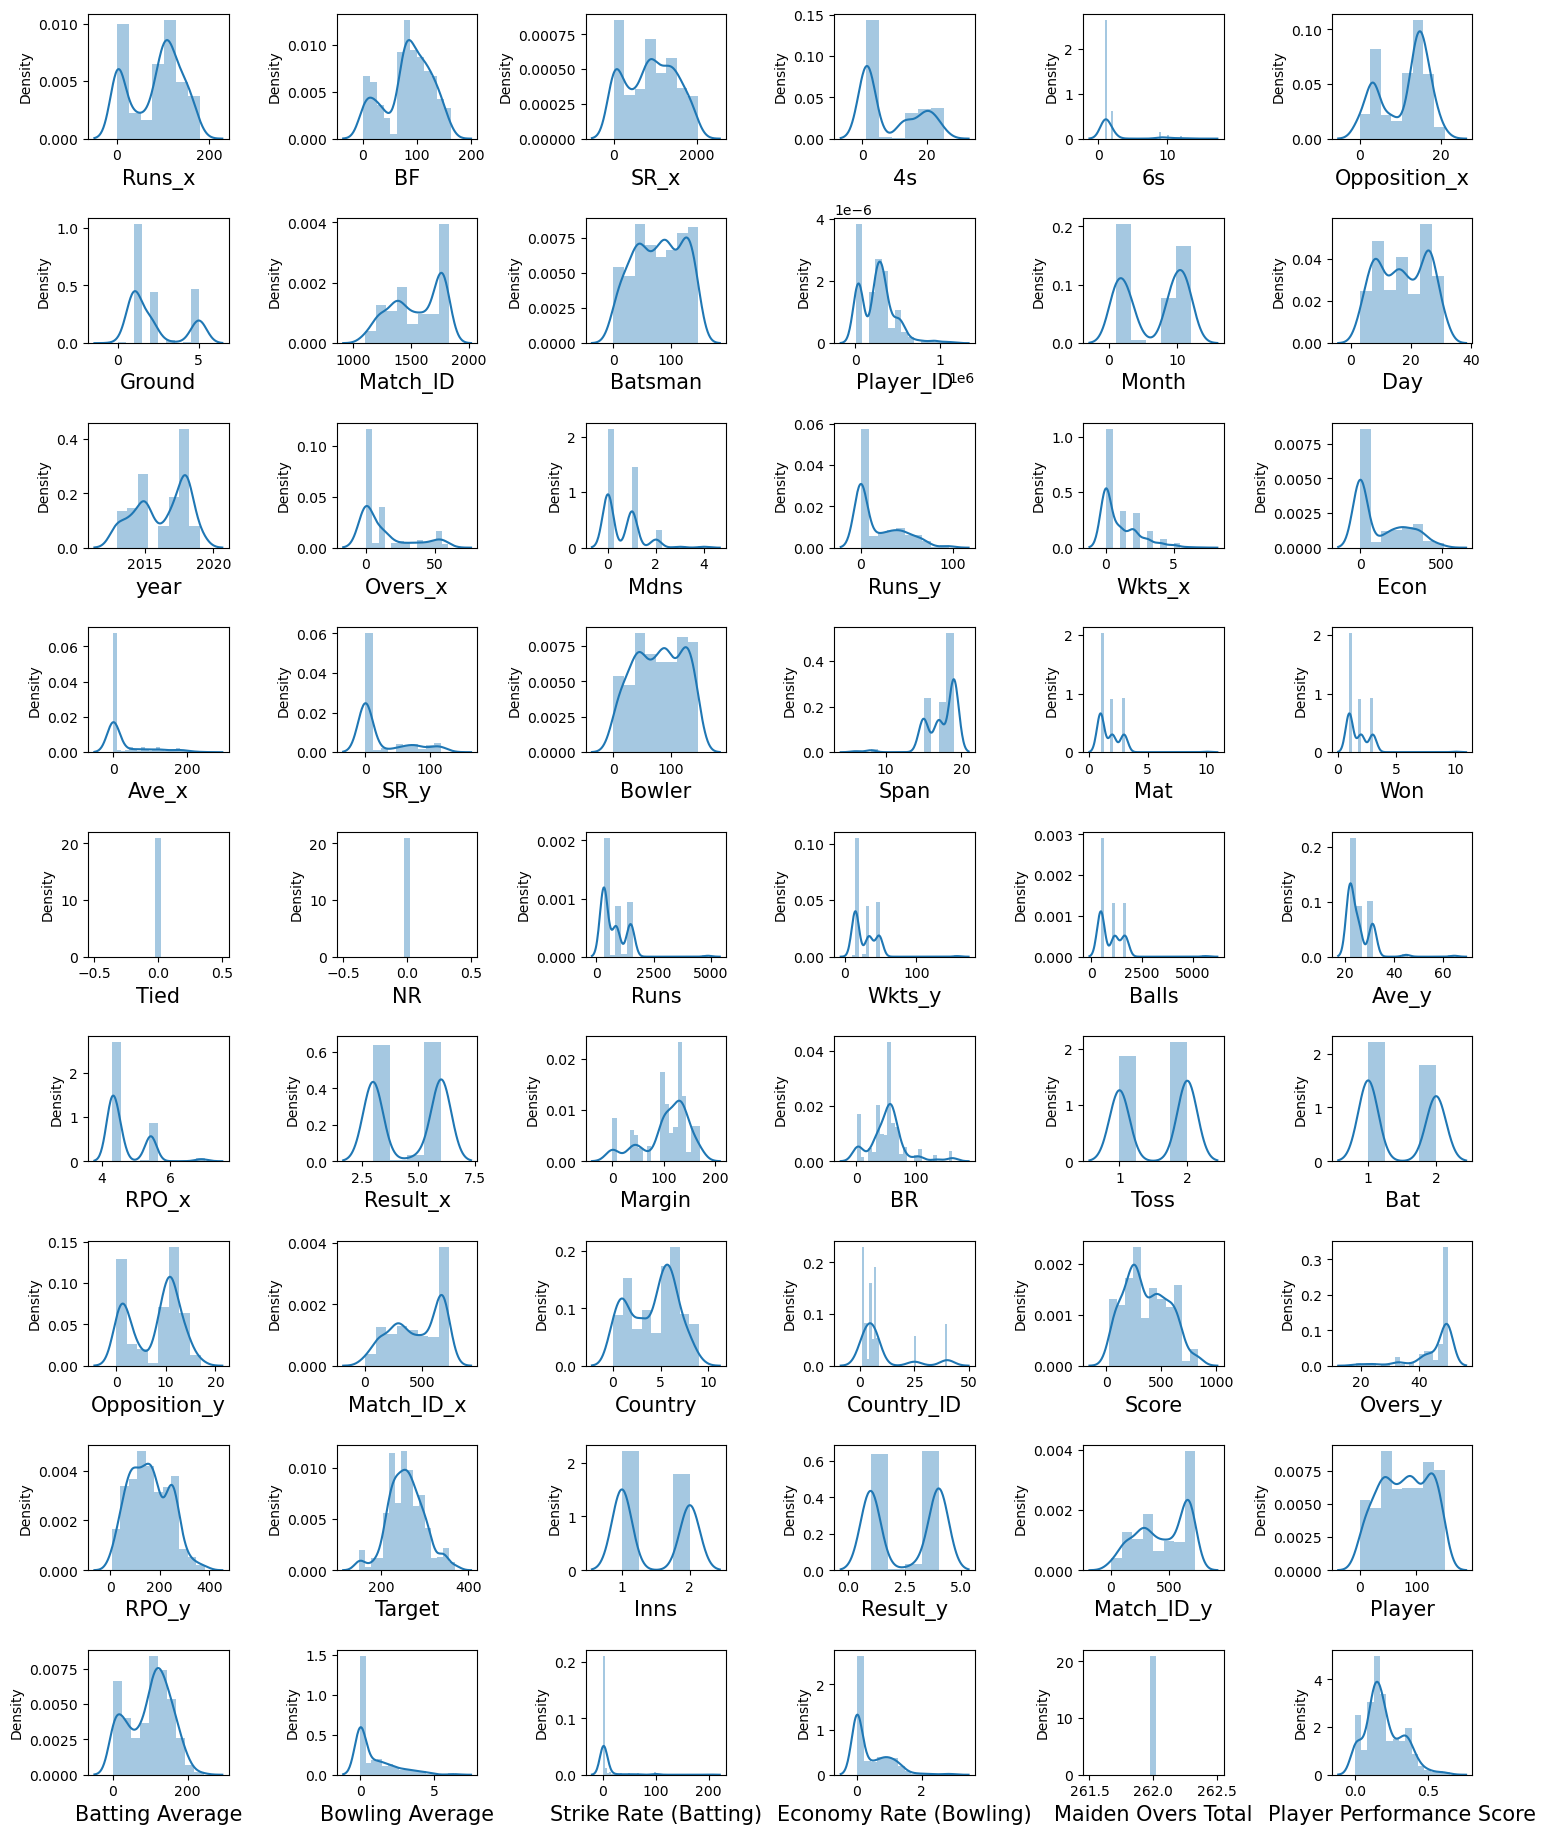

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
plotnumber = 1
for column in master_after_join:
    if plotnumber <= 60:
        ax = plt.subplot(10, 6, plotnumber)
        sns.distplot(master_after_join[column])
        plt.xlabel(column, fontsize=15)
    plotnumber += 1
plt.tight_layout()


In [219]:
# From above distribution we can see there are skewed data avilabe so lets check again by using skew method
master_after_join.skew()

Runs_x                     -0.346075
BF                         -0.445824
SR_x                       -0.039165
4s                          0.578048
6s                          2.952126
Opposition_x               -0.516344
Ground                      0.970068
Match_ID                   -0.326713
Batsman                    -0.105322
Player_ID                   0.979422
Month                      -0.134240
Day                        -0.024541
year                       -0.322862
Overs_x                     1.262778
Mdns                        1.473151
Runs_y                      1.019444
Wkts_x                      1.420556
Econ                        0.740863
Ave_x                       1.770862
SR_y                        1.372929
Bowler                     -0.097655
Span                       -2.101193
Mat                         3.289249
Won                         3.289249
Tied                        0.000000
NR                          0.000000
Runs                        2.546417
W

In [220]:
master_after_join.columns

Index(['Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
       'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
       'Result_y', 'Match_ID_y', 'Player', 'Batting Average',
       'Bowling Average', 'Strike Rate (Batting)', 'Economy Rate (Bowling)',
       'Maiden Overs Total', 'Player Performance Score'],
      dtype='object')

A skewness value close to 0 (between -0.5 and 0.5) indicates that the data has a roughly symmetric distribution. The tail of the distribution is approximately balanced, and the data is evenly distributed around the mean. In this case, the data is not significantly skewed, and no further action may be required.

In [221]:
# Lets Seaprate the skewed columns or featres based on above thumb rule
master_after_join.skew()[(master_after_join.skew() >= 0.5) & (master_after_join.skew() >= -0.5)]

4s                          0.578048
6s                          2.952126
Ground                      0.970068
Player_ID                   0.979422
Overs_x                     1.262778
Mdns                        1.473151
Runs_y                      1.019444
Wkts_x                      1.420556
Econ                        0.740863
Ave_x                       1.770862
SR_y                        1.372929
Mat                         3.289249
Won                         3.289249
Runs                        2.546417
Wkts_y                      2.866807
Balls                       2.933363
Ave_y                       3.219416
RPO_x                       1.697543
BR                          1.052424
Country_ID                  2.054187
Bowling Average             1.558220
Strike Rate (Batting)       5.422171
Economy Rate (Bowling)      1.403963
Player Performance Score    0.637891
dtype: float64

In [222]:
skew_col=['4s','6s','Ground','Player_ID','Overs_x','Mdns','Runs_y','Wkts_x','Econ','Ave_x','SR_y','Mat','Won','Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x','BR','Country_ID','Bowling Average','Bowling Average','Economy Rate (Bowling)']
len(skew_col)

23

In [223]:
# Now lets use Power transformation for remove the skewness form Data Set 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
master_after_join[skew_col]=pt.fit_transform(master_after_join[skew_col].values)
master_after_join[skew_col]

,4s,6s,Ground,Player_ID,Overs_x,Mdns,Runs_y,Wkts_x,Econ,Ave_x,...,Runs,Wkts_y,Balls,Ave_y,RPO_x,BR,Country_ID,Bowling Average,Bowling Average,Economy Rate (Bowling)
0,-1.026769,-0.583898,-0.800802,-1.180360,1.311568,0.916445,1.131556,0.592840,1.165113,-0.650676,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,0.108478,0.524365,1.405157,1.405157,1.112272
1,-1.026769,-0.583898,-0.800802,-1.180360,0.803906,0.916445,1.262451,1.647705,1.164318,1.476073,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,-2.044235,0.524365,1.576443,1.576443,1.370392
2,-1.026769,-0.583898,-0.800802,-1.180360,0.803906,0.916445,1.316390,1.110734,1.201152,1.626443,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,0.563164,0.524365,1.637546,1.637546,1.579633
4,-0.494699,-0.583898,-0.800802,0.360856,-0.912669,-0.913790,-0.915953,-0.900441,-0.922171,-0.650676,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,0.108478,0.524365,-0.876094,-0.876094,-0.878602
5,1.161413,2.097507,-0.800802,0.360856,-0.912669,-0.913790,-0.915953,-0.900441,-0.922171,-0.650676,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,-2.044235,0.524365,-0.876094,-0.876094,-0.878602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1.279046,-0.583898,1.479571,0.582794,1.193187,0.916445,1.203885,0.592840,1.278368,-0.650676,...,1.285847,1.252428,1.242065,1.372273,1.525265,0.261698,0.022895,0.770502,0.770502,1.242550
506,1.161413,-0.583898,1.479571,1.104869,0.839262,0.916445,1.422196,0.592840,1.082721,-0.650676,...,1.285847,1.252428,1.242065,1.372273,1.525265,1.605729,0.022895,1.218694,1.218694,1.733722
507,0.956128,-0.583898,1.479571,1.104869,1.193187,0.916445,1.256476,1.110734,0.599664,1.620341,...,1.285847,1.252428,1.242065,1.372273,1.525265,-2.044235,0.022895,0.880685,0.880685,1.460075
508,-1.026769,-0.583898,1.479571,1.104869,0.803906,1.501488,1.165771,1.538131,1.074806,1.486335,...,1.285847,1.252428,1.242065,1.372273,1.525265,0.261698,0.022895,0.691085,0.691085,1.161777


In [224]:
# Lest Check again the Skewed value 
master_after_join.skew()

Runs_x                     -0.346075
BF                         -0.445824
SR_x                       -0.039165
4s                          0.230032
6s                          1.192112
Opposition_x               -0.516344
Ground                      0.096855
Match_ID                   -0.326713
Batsman                    -0.105322
Player_ID                  -0.198176
Month                      -0.134240
Day                        -0.024541
year                       -0.322862
Overs_x                     0.252258
Mdns                        0.265824
Runs_y                      0.220357
Wkts_x                      0.329869
Econ                        0.183360
Ave_x                       0.903190
SR_y                        0.890700
Bowler                     -0.097655
Span                       -2.101193
Mat                         0.277049
Won                         0.277049
Tied                        0.000000
NR                          0.000000
Runs                        0.223645
W

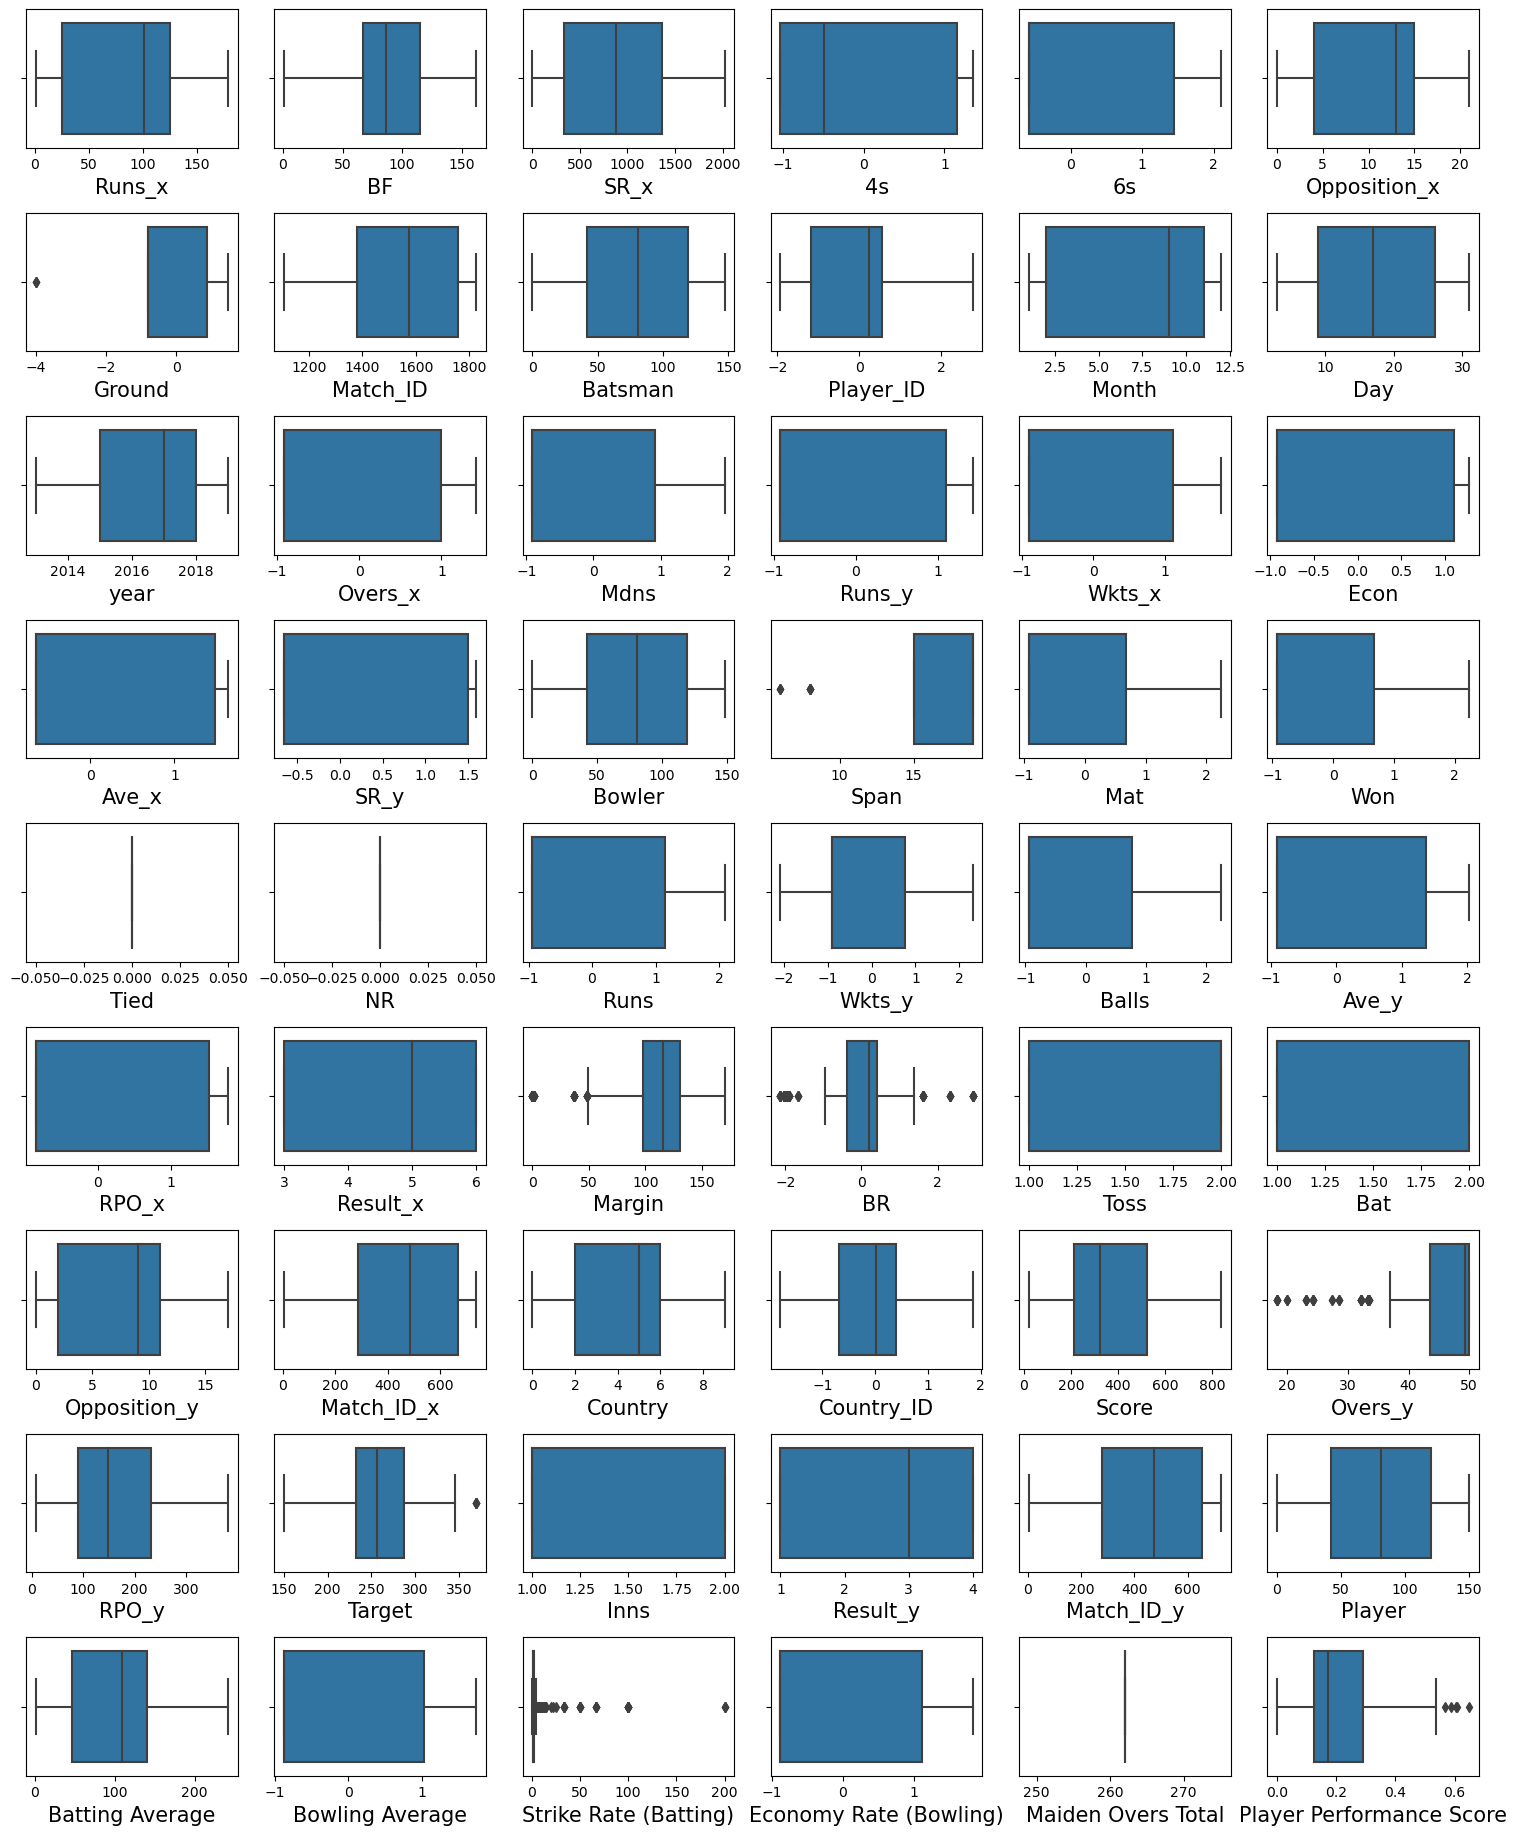

In [225]:
# Now almost All skewness we removed so move further
#Let's check for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [226]:
# So from graph we can see the outlier are present in the some columns so lets remove them first 
outliers_col=['Margin', 'BR','Overs_y','Target','Ground','Span','Strike Rate (Batting)','Player Performance Score']

In [227]:
# Remove the outliers by using Z score
from scipy.stats import zscore
z_score=zscore(master_after_join[outliers_col])
z_score_abs=np.abs(z_score)
filter_entry=(z_score_abs<3).all(axis=1)
master_after_join=master_after_join[filter_entry]
master_after_join.head()

,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,Player_ID,...,Inns,Result_y,Match_ID_y,Player,Batting Average,Bowling Average,Strike Rate (Batting),Economy Rate (Bowling),Maiden Overs Total,Player Performance Score
0,1,108,1,-1.026769,-0.583898,15,-0.800802,1225,80,-1.180360,...,1.0,1.0,123.0,80,42.0,1.405157,0.925926,1.112272,262,0.231024
2,2,130,518,-1.026769,-0.583898,0,-0.800802,1750,80,-1.180360,...,2.0,1.0,648.0,80,36.5,1.637546,1.538462,1.579633,262,0.368913
4,158,141,4,-0.494699,-0.583898,15,-0.800802,1225,78,0.360856,...,1.0,1.0,123.0,78,158.0,-0.876094,0.709220,-0.878602,262,0.195516
5,122,99,256,1.161413,2.097507,15,-0.800802,1227,78,0.360856,...,2.0,4.0,125.0,78,122.0,-0.876094,2.020202,-0.878602,262,0.152018
6,72,71,4,0.956128,-0.583898,0,-0.800802,1750,78,0.360856,...,2.0,1.0,648.0,78,72.0,-0.876094,2.816901,-0.878602,262,0.090577


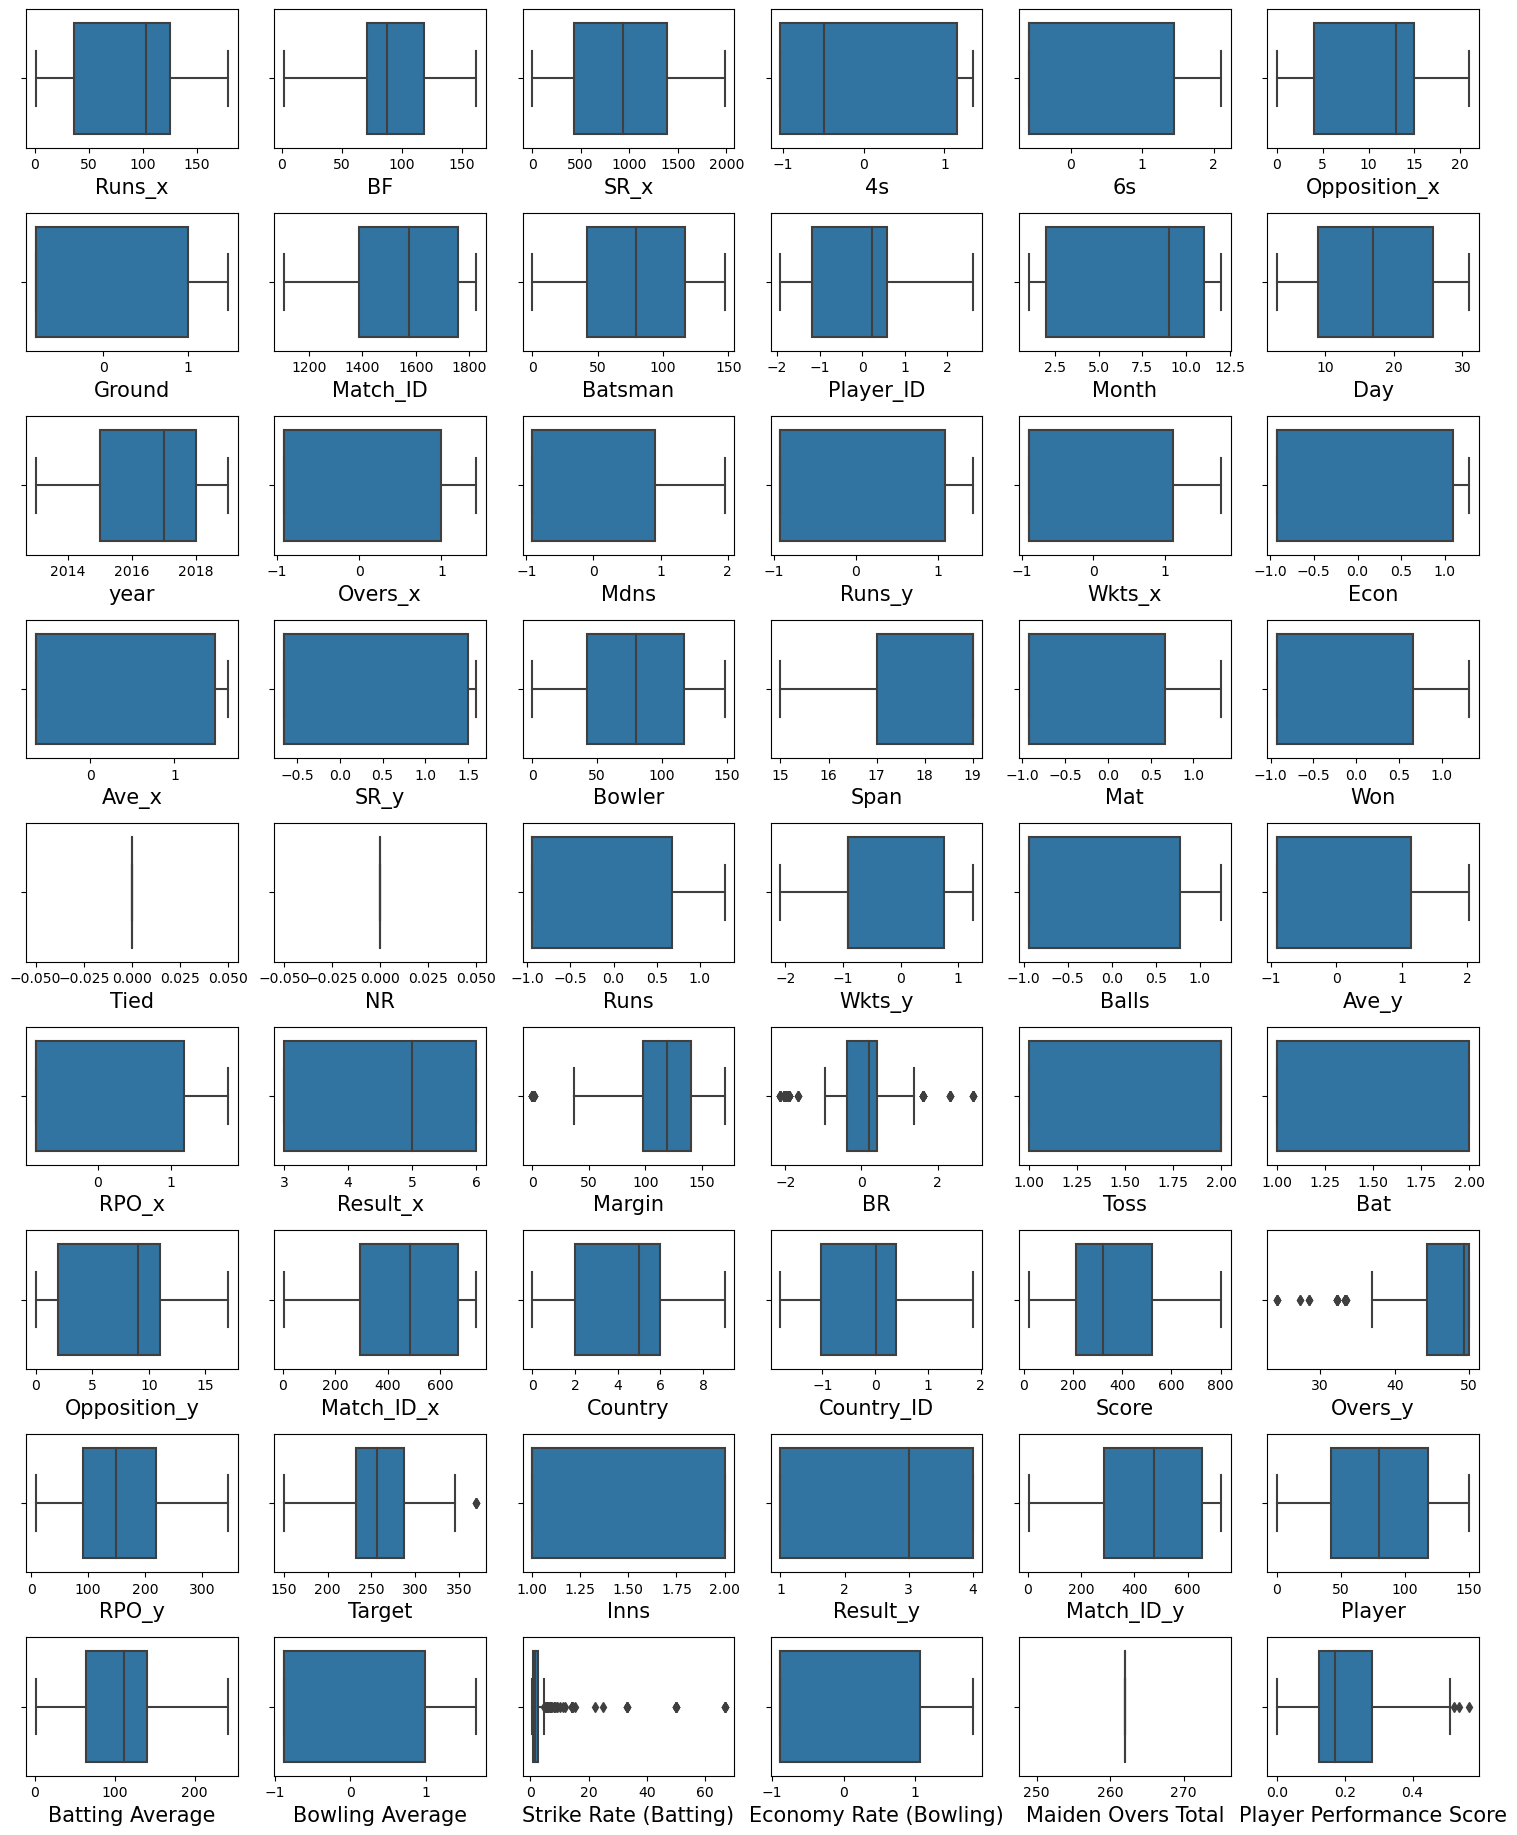

In [228]:
#Let's recheck for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [230]:
# Use 'Player Performance Score' as the target variable for the prediction model

x = master_after_join[['Runs', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
          'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
          'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
          'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
          'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
          'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
          'Result_y', 'Match_ID_y']]

y = master_after_join['Player Performance Score']  # Target column

In [231]:
print(x.shape, y.shape)

(410, 48) (410,)


In [232]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [233]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

             vif       featurs
0            inf          Runs
1   1.342114e+00        Runs_x
2   1.180397e+00            BF
3   1.283373e+00          SR_x
4   1.567659e+00            4s
5   1.298309e+00            6s
6   9.733573e+01  Opposition_x
7            inf        Ground
8            inf      Match_ID
9   3.763126e+04       Batsman
10  1.210467e+00     Player_ID
11  2.547686e+01         Month
12  1.563185e+00           Day
13  5.261802e+02          year
14  3.020719e+01       Overs_x
15  3.252771e+01          Mdns
16  5.539348e+01        Runs_y
17  6.642535e+01        Wkts_x
18  7.282800e+01          Econ
19  2.957555e+02         Ave_x
20  3.117870e+02          SR_y
21  3.762044e+04        Bowler
22           inf          Span
23           inf           Mat
24           inf           Won
25           NaN          Tied
26           NaN            NR
27           inf          Runs
28           inf        Wkts_y
29           inf         Balls
30           inf         Ave_y
31      

VIF is a measure of how much the variance of an estimated regression coefficient increases if your predictors are correlated. It helps identify multicollinearity, where predictor variables are highly correlated with each other.

To interpret the VIF values:

VIF values less than 1: Indicates that there is no multicollinearity between the variable and other variables. A VIF below 1 is usually considered safe.

VIF values around 1: Indicates very low or no multicollinearity. This is also considered safe.

VIF values between 1 and 5: Suggests moderate multicollinearity, which may not significantly affect the results. However, it's better to investigate further and consider removing correlated variables if possible.

VIF values above 5: Suggests high multicollinearity. This can cause unstable estimates in regression models. Variables with VIF above 5 may need to be addressed, either by removing them from the model or using techniques like feature selection.

VIF values above 10: Strongly suggest high multicollinearity, and it is essential to address this issue before proceeding with modeling.

As we seen we have lots of variable which is VIF value is more than 5 so insteaed of removing then i am going to use PCA tech.

In [235]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)

array([[-2.43239186e+00,  1.07115991e+00,  3.03291961e+00, ...,
         8.77363168e-17, -2.20677563e-16,  2.89200666e-15],
       [-3.93651297e+00,  3.32539781e+00, -3.09096514e+00, ...,
         1.15387235e-15, -4.76103525e-16, -7.77199288e-16],
       [-1.88398759e+00, -2.60861187e+00,  2.30031765e+00, ...,
         2.55583067e-16, -5.89282251e-16, -3.98103558e-17],
       ...,
       [ 4.18160365e+00,  3.55251813e+00,  3.11380687e-01, ...,
        -1.83369575e-16,  1.59115693e-16,  1.34373070e-16],
       [ 3.55827508e+00,  4.39338335e+00, -1.24476368e-01, ...,
        -1.05373373e-16,  8.19642227e-16,  5.98303417e-20],
       [ 4.31009448e+00,  1.21192202e+00,  2.88686351e-01, ...,
        -8.43104542e-17,  2.04512066e-16,  4.02552196e-16]])

Text(0.5, 1.0, 'PCA Plot')

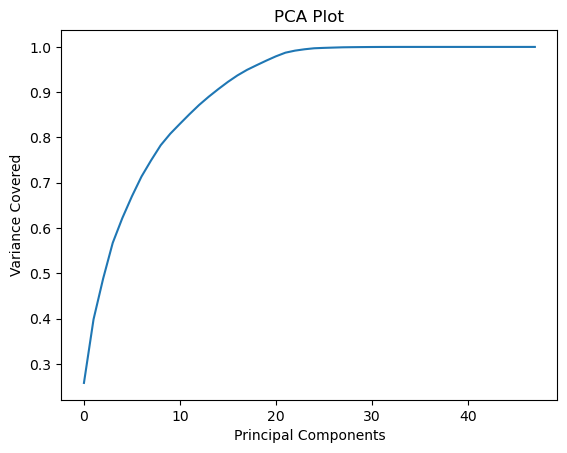

In [236]:
# Lets plot the PCA plot to select the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA Plot")

From graph we can see arround 19 principal components are able to explain greater than 95% variance. So its safe to consider the 19 pca. and move further.

In [237]:
pca=PCA(n_components=19)
pca_x=pca.fit_transform(x_scaled)
pca_x=pd.DataFrame(pca_x,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])
pca_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-2.432392,1.071160,3.032920,2.930792,1.274191,2.293597,1.849305,0.327911,-1.291780,-0.739742,0.000064,-0.176558,-0.884423,0.995824,-1.319265,0.202183,1.690265,1.070929,0.784330
1,-3.936513,3.325398,-3.090965,1.967680,1.116951,-0.430255,0.088240,-0.006243,-0.974452,-1.331003,0.574551,-0.456456,-0.056541,1.921031,0.092099,0.950046,1.375619,-0.571747,0.033089
2,-1.883988,-2.608612,2.300318,2.402679,1.162340,1.794814,1.464285,1.202939,0.242223,0.185796,-0.843535,-1.974707,-1.664325,1.300037,0.419911,0.290439,-0.082845,1.790832,0.313589
3,-1.602697,-3.332631,1.974760,1.712245,3.537482,-1.402552,-0.807371,-0.456930,-0.286242,1.524547,-1.765129,0.209124,-1.342165,1.046052,-0.665080,-0.379733,-0.691356,-0.007744,-0.729571
4,-3.180785,-1.962327,-4.212243,1.645667,0.731703,-0.072574,0.504704,-0.122143,-0.949797,-0.872003,-0.658256,0.056126,-0.710818,0.912292,0.534859,-0.093394,0.426273,1.166506,-1.271631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,3.910785,2.321297,-0.618030,-2.397541,0.136252,-0.124850,-1.313568,1.376553,-0.835363,-1.290291,-1.162536,-0.505937,-0.081872,-0.466130,-1.667324,-0.593235,0.976789,2.064212,-1.150620
406,3.425417,2.385482,-1.262757,1.732350,-2.774664,-0.346269,1.352286,0.144339,2.472727,-0.785749,-1.416542,-0.173066,0.596199,-0.811585,-1.335458,-1.312792,1.236554,0.920448,-0.537066
407,4.181604,3.552518,0.311381,-1.264509,1.291096,-1.717308,-0.745400,-1.909166,-0.654665,1.111055,0.187819,-1.750619,-1.154135,-0.613419,-0.773655,-0.094635,1.472309,-0.820773,-1.574993
408,3.558275,4.393383,-0.124476,-2.626676,0.071472,-1.051430,-0.625963,1.255141,-0.895169,-1.300745,-1.472285,-1.323475,-0.106650,-0.730887,0.054452,0.943829,-0.740887,0.550558,-0.295756


# Model Selection and Building

In [238]:
# Lets select the proper random state to build best model by using LogisticRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= i )
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    y_pred=lr.predict(x_train) # prediction on train data
    r1 =r2_score(y_train,y_pred) # accuracy check on train data
    
    pred = lr.predict(x_test)   #prediction on test data
    r2 =r2_score(y_test,pred) #accuracy check on test data
    
    if r2 > acc_score_test and r1 > acc_score_train: # selecting max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))


at random sate 1, the training accuracy is:- 0.785590201715373
at random sate 1, the testing accuracy is:- 0.6963438687723341


at random sate 2, the training accuracy is:- 0.785590201715373
at random sate 2, the testing accuracy is:- 0.6963438687723341


at random sate 3, the training accuracy is:- 0.785590201715373
at random sate 3, the testing accuracy is:- 0.6963438687723341


at random sate 4, the training accuracy is:- 0.785590201715373
at random sate 4, the testing accuracy is:- 0.6963438687723341


at random sate 5, the training accuracy is:- 0.785590201715373
at random sate 5, the testing accuracy is:- 0.6963438687723341


at random sate 6, the training accuracy is:- 0.785590201715373
at random sate 6, the testing accuracy is:- 0.6963438687723341


at random sate 7, the training accuracy is:- 0.785590201715373
at random sate 7, the testing accuracy is:- 0.6963438687723341


at random sate 8, the training accuracy is:- 0.785590201715373
at random sate 8, the testing accuracy is

at random sate 67, the training accuracy is:- 0.785590201715373
at random sate 67, the testing accuracy is:- 0.6963438687723341


at random sate 68, the training accuracy is:- 0.785590201715373
at random sate 68, the testing accuracy is:- 0.6963438687723341


at random sate 69, the training accuracy is:- 0.785590201715373
at random sate 69, the testing accuracy is:- 0.6963438687723341


at random sate 70, the training accuracy is:- 0.785590201715373
at random sate 70, the testing accuracy is:- 0.6963438687723341


at random sate 71, the training accuracy is:- 0.785590201715373
at random sate 71, the testing accuracy is:- 0.6963438687723341


at random sate 72, the training accuracy is:- 0.785590201715373
at random sate 72, the testing accuracy is:- 0.6963438687723341


at random sate 73, the training accuracy is:- 0.785590201715373
at random sate 73, the testing accuracy is:- 0.6963438687723341


at random sate 74, the training accuracy is:- 0.785590201715373
at random sate 74, the tes

at random sate 147, the training accuracy is:- 0.7876044599925064
at random sate 147, the testing accuracy is:- 0.7052128972868148


at random sate 148, the training accuracy is:- 0.7876044599925064
at random sate 148, the testing accuracy is:- 0.7052128972868148


at random sate 149, the training accuracy is:- 0.7876044599925064
at random sate 149, the testing accuracy is:- 0.7052128972868148


at random sate 150, the training accuracy is:- 0.7876044599925064
at random sate 150, the testing accuracy is:- 0.7052128972868148


at random sate 151, the training accuracy is:- 0.7876044599925064
at random sate 151, the testing accuracy is:- 0.7052128972868148


at random sate 152, the training accuracy is:- 0.7876044599925064
at random sate 152, the testing accuracy is:- 0.7052128972868148


at random sate 153, the training accuracy is:- 0.7876044599925064
at random sate 153, the testing accuracy is:- 0.7052128972868148


at random sate 154, the training accuracy is:- 0.7876044599925064
at 

In [239]:
rand_state

133

In [240]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= rand_state )

In [241]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(287, 19)
(123, 19)
(287,)
(123,)


In [247]:
! pip install xgboost

     -------------------------------------- 99.7/99.7 MB 294.0 kB/s eta 0:00:00


In [248]:
from xgboost import XGBClassifier  # for classification tasks
# or
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()

from sklearn.ensemble import RandomForestRegressor
rfc= RandomForestRegressor()


import xgboost as xgb
xgb=xgb.XGBRegressor()

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

from sklearn.model_selection import cross_val_score


models=[]
models.append(('LinearRegression', LR))
models.append(('DecisionTreeRegressor', dt))
models.append(('AdaBoostRegressor', ada))
models.append(('GradientBoostingRegressor', gb))
models.append(('RandomForestRegressor', rfc))
models.append(('XGBRegressor', xgb))
models.append(('KNeighborsRegressor', knn))


In [249]:
m=[]
score=[]
score2=[]
cv_score=[]
MAE_score=[]
MSE_score=[]
for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train, y_train)
    print(model)
    y_pred=model.predict(x_train)
    AS=r2_score(y_train,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)
    
    pred=model.predict(x_test)
    AS2=r2_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    MAE=mae(y_test,pred)
    print("Mean Squered Error:",MAE)
    MAE_score.append(MAE*100)
    MSE=mse(y_test,pred)
    print("Mean Absolute Error:", MSE)
    MSE_score.append(MSE*100)
    
    accuracies= cross_val_score(model,x,y, cv=2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('\n')

*********************** LinearRegression ***********************
LinearRegression()
Train Report: 0.7876044599925064
Test Report: 0.7052128972868148
Mean Squered Error: 0.048877750173601006
Mean Absolute Error: 0.004938249950091293
Accuracy: 87.65 %
Standard Deviation: 3.25 %


*********************** DecisionTreeRegressor ***********************
DecisionTreeRegressor()
Train Report: 1.0
Test Report: 0.42321458357537034
Mean Squered Error: 0.07322535753659205
Mean Absolute Error: 0.00966226313043143
Accuracy: 86.93 %
Standard Deviation: 0.57 %


*********************** AdaBoostRegressor ***********************
AdaBoostRegressor()
Train Report: 0.8434574515534542
Test Report: 0.6163278345130907
Mean Squered Error: 0.05857841275382071
Mean Absolute Error: 0.006427245407376513
Accuracy: 90.49 %
Standard Deviation: 1.86 %


*********************** GradientBoostingRegressor ***********************
GradientBoostingRegressor()
Train Report: 0.9779246066062705
Test Report: 0.6603125475224023
M

In [250]:
print(len(m),len(score),len(score2),len(cv_score),len(MAE_score),len(MSE_score))

7 7 7 7 7 7


In [251]:
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score, 'MAE_score':MAE_score,'MSE_score':MSE_score })
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score
0,LinearRegression,78.760446,70.521290,87.651765,4.887775,0.493825
1,DecisionTreeRegressor,100.000000,42.321458,86.926039,7.322536,0.966226
2,AdaBoostRegressor,84.345745,61.632783,90.491121,5.857841,0.642725
3,GradientBoostingRegressor,97.792461,66.031255,95.544567,5.257599,0.569042
4,RandomForestRegressor,95.610818,64.150044,92.528392,5.504033,0.600556
5,XGBRegressor,99.997475,61.240177,NaN,5.512729,0.649301
6,KNeighborsRegressor,68.852813,48.683445,-10.572279,6.903523,0.859651


In [252]:
result['lest_diff']=(result['Accuracy_test_score']-result['Cross_val_score'])
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score,lest_diff
0,LinearRegression,78.760446,70.521290,87.651765,4.887775,0.493825,-17.130475
1,DecisionTreeRegressor,100.000000,42.321458,86.926039,7.322536,0.966226,-44.604580
2,AdaBoostRegressor,84.345745,61.632783,90.491121,5.857841,0.642725,-28.858338
3,GradientBoostingRegressor,97.792461,66.031255,95.544567,5.257599,0.569042,-29.513312
4,RandomForestRegressor,95.610818,64.150044,92.528392,5.504033,0.600556,-28.378349
5,XGBRegressor,99.997475,61.240177,NaN,5.512729,0.649301,NaN
6,KNeighborsRegressor,68.852813,48.683445,-10.572279,6.903523,0.859651,59.255724


# HyperParameter Tuning

In [253]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_jobs':range(1,55)}
rand=RandomizedSearchCV(estimator=LR, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'n_jobs': 27}

In [254]:
LR= LinearRegression(n_jobs= 17)

LR.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=r2_score(y_train,y_pred)
print("Train Report:",AS*100) 
pred=LR.predict(x_test)
AS2=r2_score(y_test,pred)
print("Test Report:",AS2*100)
MAE=mae(y_test,pred)
print("Mean Squered Error:",MAE)
MSE=mse(y_test,pred)
print("Mean Absolute Error:", MSE)
    
accuracies= cross_val_score(LR,x_scaled, y, cv=5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 84.34574515534543
Test Report: 70.52128972868148
Mean Squered Error: 0.048877750173601006
Mean Absolute Error: 0.004938249950091293
Accuracy: 88.64 %
Standard Deviation: 3.60 %


As we seen there is no change in accuracy so we are cosidering the same model is the best model and finalised the same model.

In [255]:
# Save Model
import pickle
file='Final_CR_Performance_model.pickle'
model=pickle.dump(LR,open(file,'wb'))